In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#simple 1D loss function
def loss_function(phi):
  return 1-0.5 * np.exp(-(phi - 0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

def draw_function(loss_function, a = None, b = None, c = None, d = None):
  #plotting the function
  phi_plot = np.arange(0, 1, 0.01)
  fig, ax = plt.subplots()
  ax.plot(phi_plot, loss_function(phi_plot), ['r-'])
  ax.set_xlim(0, 1) ; ax.set_ylim(0, 1)
  ax.set_xlabel('phi') ; ax.set_ylabel('L(phi)')
  if a is not None and b is not None and c is not None and d is not None:
    plt.axvspan(a, d, facecolor = "k", alpha = 0.2)
    ax.plot([a, a], [0, 1], 'b-')
    ax.plot([b, b], [0, 1], 'b-')
    ax.plot([c, c], [0, 1], 'b-')
    ax.plot([d, d], [0, 1], 'b-')
  plt.show()

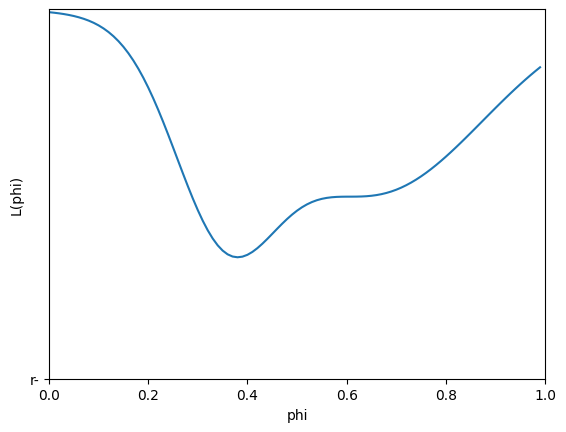

In [ ]:
draw_function(loss_function)

In [ ]:
#the line search procedure to find the minimum in the range 0, 1
def line_search(loss_function, thresh=.0001, max_iter = 10, draw_flag = False):
  #making initializations
  a = 0
  b = 0.33
  c = 0.66
  d = 1.0
  n_iter = 0

  while np.abs(b -c) > thresh and n_iter < max_iter:
    n_iter = n_iter + 1

    #calculating the loss for all the four points.
    lossa = loss_function(a)
    lossb = loss_function(b)
    lossc = loss_function(c)
    lossd = loss_function(d)

    if draw_flag:
      draw_function(loss_function, a, b, c, d)

    print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))

    #Rules of the line search Algorithm
    # Rule #1 If the HEIGHT at point A is less the HEIGHT at points B, C, and D then halve values of B, C, and D
    if ((lossa < lossb) and (lossa < lossc) and (lossa < lossd)):
      b = b/2
      c = c/2
      d = d/2
      continue;

    # Rule #2 If the HEIGHT at point b is less than the HEIGHT at point c then
    #                     then point d becomes point c, and
    #                     point b becomes 1/3 between a and new d
    #                     point c becomes 2/3 between a and new d

    if (lossb < lossc):
      d = c
      b = (d + a)/3
      c = (2*(d + a))
      continue;

    # Rule #3 If the HEIGHT at point c is less than the HEIGHT at point b then
    #                     then point a becomes point b, and
    #                     point b becomes 1/3 between new a and d
    #                     point c becomes 2/3 between new a and d

    if (lossc < lossb):
      a = b
      b = (d + a)/3
      c = (2*(d + a))/3
      continue;

  soln = (b + c)/2

  return soln


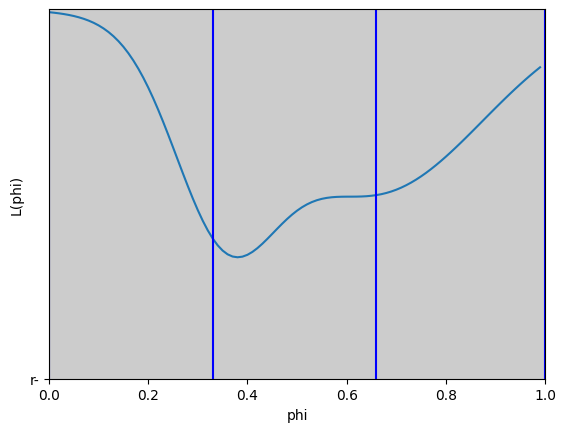

Iter 1, a=0.000, b=0.330, c=0.660, d=1.000


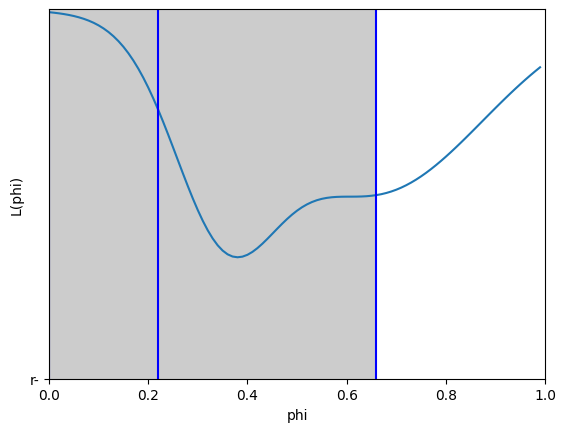

Iter 2, a=0.000, b=0.220, c=1.320, d=0.660


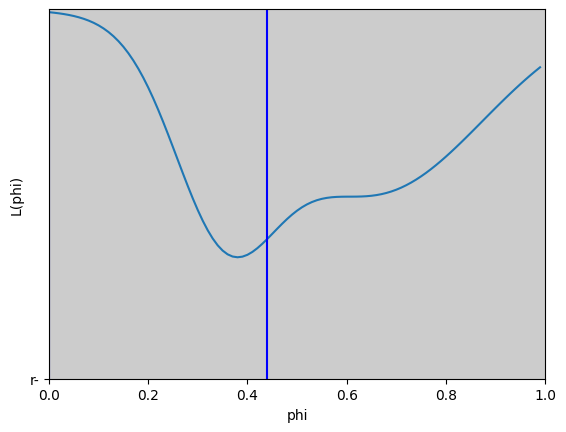

Iter 3, a=0.000, b=0.440, c=2.640, d=1.320


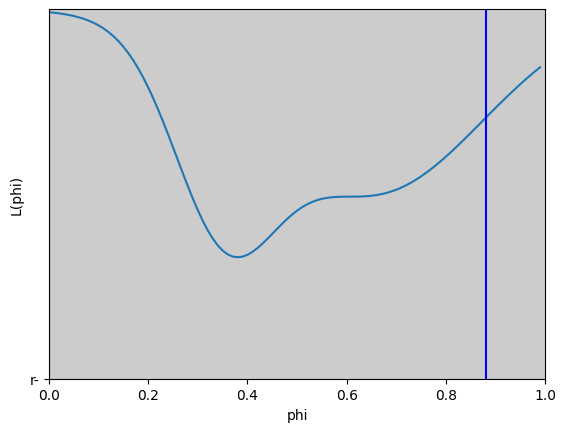

Iter 4, a=0.000, b=0.880, c=5.280, d=2.640


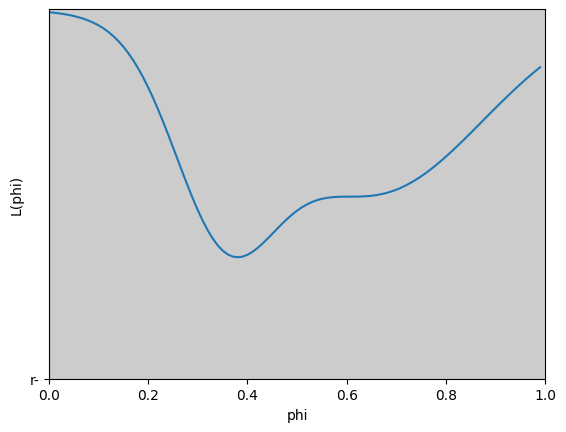

Iter 5, a=0.000, b=1.760, c=10.560, d=5.280


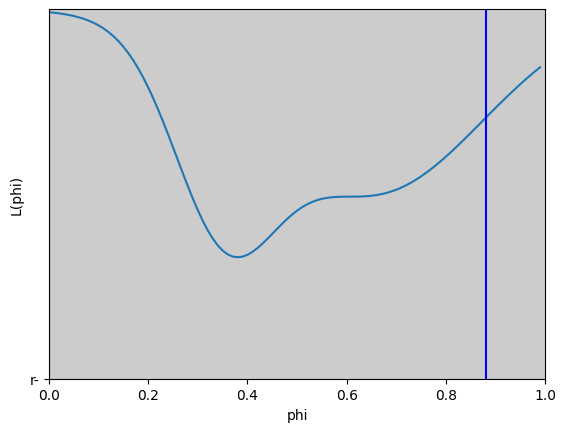

Iter 6, a=0.000, b=0.880, c=5.280, d=2.640


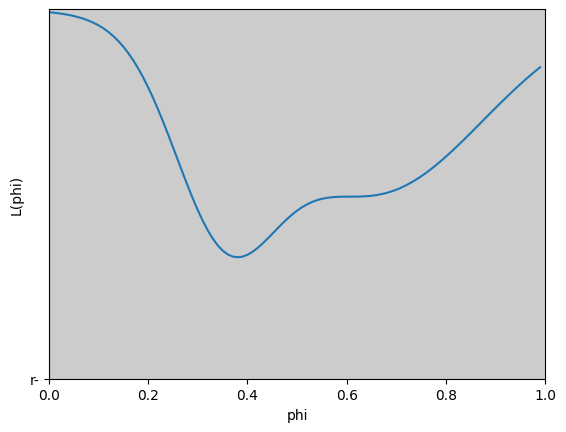

Iter 7, a=0.000, b=1.760, c=10.560, d=5.280


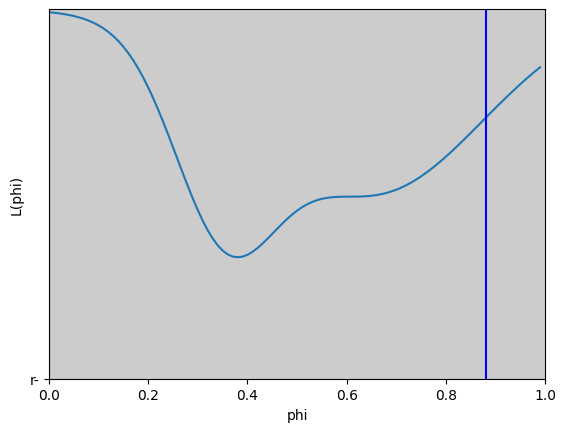

Iter 8, a=0.000, b=0.880, c=5.280, d=2.640


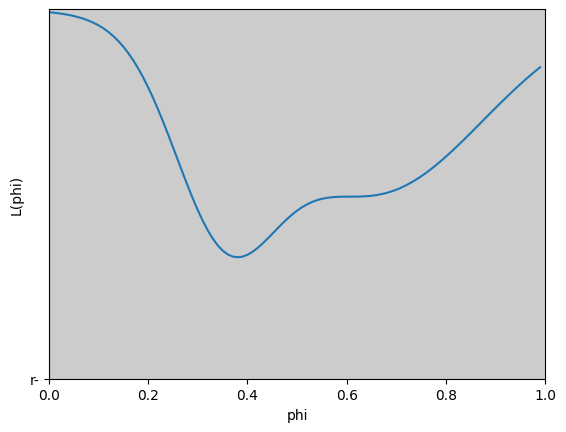

Iter 9, a=0.000, b=1.760, c=10.560, d=5.280


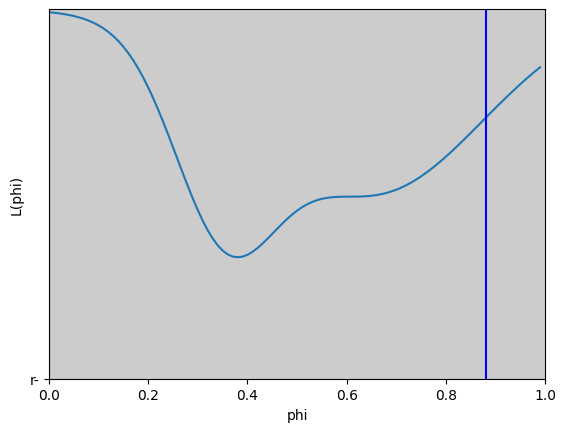

Iter 10, a=0.000, b=0.880, c=5.280, d=2.640
Soln = 6.160, loss = 1.000


In [ ]:
soln = line_search(loss_function, draw_flag = "True")
print('Soln = %3.3f, loss = %3.3f'%(soln,loss_function(soln)))